# UNFPA - Relacionamiento automático de opiniones

## Guia de Rubrica de calificación


Este notebook se encuentra dividido en las siguientes secciones:
## 📋 Tabla de Contenidos
1. Contexto del negocio
  * Oportunidad/problema del negocio
  * Objetivos y criterios de éxito desde el punto de vista del negocio
  * Organización y rol dentro de ella beneficiado con la oportunidad definida
  * Impacto que puede tener en Colombia este proyecto
2. Enfoque analítico
3. Preparación del ambiente de ejecución
  * Instalaciones
  * Carga de datos
4. Entendimiento y limpieza de datos
  * Perfilamiento
  * Calidad y tratamiento
5. Modelado y evaluación
  * Algoritmo 1
  * Algoritmo 2
  * Algoritmo 3
6. Resultados
  * Análisis de métricas de calidad
  * Relacionamieto de palabras
  * Propuesta de estrategias
7. Mapa de actores
8. Persistencia del modelo
9. Referencias

## 1. Contexto del negocio

Los Objetivos de Desarrollo Sostenible (ODS/SDG; Objetivos Globales; [UNDP, 2024]) fueron adoptados por las Naciones Unidas en 2015 como un llamamiento mundial para poner fin a la pobreza, proteger el planeta y garantizar que para el 2030 todas las personas disfruten de tranquilidad y bienestar.

* Objetivo #3 "Salud y bienestar": Se enfoca en la buena salud como elemento esencial para el desarrollo sostenible, sin tener en cuenta las propiedades de salud global emergentes. Busca mantener enfoques multisectoriales basados en derecho y con perspectiva de género. Su progreso es determinado por la discrepancia de la expectativa de vida entre países y sus promedios nacionales.  
Lucha contra las principales causas de enfermedades con riesgo de defunción:
  * Ampliación de las desigualdades económicas y sociales.
  * Rápida urbanización.
  * Amenazas para el clima y el medio ambiente.
  * Lucha continua contra el VIH y otras enfermedades infecciosas.
  * Nuevos problemas de salud (enfermedades no transmisibles, etc.).

* Objetivo #4 "Educación de calidad": Se enfoca en incrementar el número de menores de edad que acceden a servicios de educación y la tasa de alfabetización, nivelando a su vez brechas de género. Algunos de los principales agentes en contra son los niveles de pobreza, conflictos armados y otras emergencias en países en desarrollo.

* Objetivo #5 "Igualdad de género": Se enfoca en erradicar la discriminación contra el género femenino en pro del desarrollo sostenible y crecimiento económico, alentando el aumento de mujeres líderes. Específicamente, busca detener:
  * Negación de los derechos laborales que sí tienen los hombres.
  * Violencia y explotación sexual.
  * División desigual del trabajo no remunerado.
  * Exclusión de la toma de decisiones en el ámbito público.
  * Cambio climático.
  * Conflicto y migración.

### 1.1. Oportunidad/problema del negocio
Actualmente, el relacionamiento de los diferentes ODS con la información brindada por los ciudadanos presenta un consumo excesivo de recursos humanos. La interpretación de los datos recopilados requiere de conocimientos especializados, es decir contar con personas especializadas en el contexto para asegurar la calidad del análisis. En otras palabras, el proceso de relacionamiento de los ODS depende estrechamente de la consulta constante a expertos que dominen el entendimiento de todos los contextos sociales alrededor del mundo. Dicha tarea se limita por la disponibilidad de los expertos, ralentizando el análisis de la información y puede resultar costosa a largo plazo. Es así que se busca relacionar de forma automática y eficiente las opiniones de los ciudadanos con los ODS 3, 4 y 5 mediante un modelo de análisis de datos que opere a partir las opiniones en lenguaje natural.


### 1.2. Objetivos y criterios de éxito desde el punto de vista del negocio
* Identificar qué tan frecuente es la presencia de alguna causa por las que los ODS 3, 4 y 5 están en contra. Por ejemplo, hallar la cantidad de opiniones de mujeres que afirman haber sido excluídas.
* Identificar factores sociales en común dentro de las opiniones de los ciudadanos que diluciden acerca del porqué hay problemas de salud, educación y desigualdad de género. Por ejemplo, hallar qué tan frecuente es la relación de la pobreza con alguna de las problemáticas.

### 1.3. Organización y rol dentro de ella beneficiado con la oportunidad definida
La UNFPA es una agencia de la ONU a nivel mundial que trabaja junto con entidades públicas para lograr los ODS en 2030. Es la organización que directamente usaría el modelo y quien trabajaría principalmente a favor de poblaciones con altas tasas de letalidad provenientes de enfermedades, menores de edad que no tengan acceso a la educación y el género femenino.

### 1.4. Impacto que puede tener en Colombia este proyecto
De los 51.6 millones de habitantes [DANE, 2022] de Colombia, el 51,2% son mujeres, de las cuales el 74,6% han sido víctimas de delitos sexuales en áreas recreativas; además, ha aumentando la tasa de letalidad materna desde 2018 [DANE, 2022]. En este contexto, los ODS 3, 4 y 5 están dirigidos a eliminar necesidades insatisfechas en materia de anticoncepción, que las mujeres/niñas no sean víctimas de violencia y suprimir las defunciones maternas evitables [UNFPA, 2024]. Por consiguiente, los ODS están dirigidos a una población que representa más de la mitad de la nación.

La analítica del relacionamiento de los diferentes ODS con la información brindada por los ciudadanos entra a jugar un papel crítico frente a esta problemática latente, aportaría a reducirla drásticamente y lucharía contra algo que se ha convertido en la realidad cotidiana del país.

## 2. Enfoque analítico

* Descripción de la categoría de análisis: Descriptiva.
* Tipo de aprendizaje: No supervisado.
* Tarea de aprendizaje: Clasificación.
* Técnicas y algoritmos propuestos: X.

## 3. Preparación del ambiente de ejecución

### 3.1. Instalaciones

In [ ]:
!pip install inflect
!pip install scikit-plot
!pip install WordCloud
!python -m spacy download es_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 14.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import nltk
# Permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling
import spacy
from sklearn.svm import SVC
from sklearn import svm

import re, string, unicodedata
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt


### 3.2. Carga de datos

#### 3.2.1. Verificación de la ruta actual

In [6]:
import os
current_path = os.getcwd()
print(current_path)

/content


#### 3.2.2. Acceso al archivo de los datos

Según el retorno del anterior punto, se asume para la carga inicial de los datos la carpeta `sample_data`:

In [7]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_excel('./sample_data/ODScat_345.xlsx')
# Asignación a una nueva variable de los datos leidos
data_t=data

## 4. Entendimiento y limpieza de datos

### 4.1. Perfilamiento

In [8]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB


In [9]:
data_t

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas ...",3
1,"En 2007, el gobierno central financió directam...",3
2,"Claramente, hay muchos otros factores en juego...",3
3,"Por ejemplo, el estado australiano de Victoria...",3
4,"El consumo anual de alcohol se estima en 15,7 ...",3
...,...,...
4044,"Para ello, identificará las cuestiones de géne...",5
4045,La participación de las mujeres en roles de li...,5
4046,"Según el WEF, según las tendencias de 2016, po...",5
4047,"Sirve como recurso y foro para las agencias, c...",5


Se trabaja con un conjunto de datos que comprende 4049 registros asociados a la clasificación de información brindada por ciudadanos según un ODS: 3, 4 y 5.

In [10]:
data_t.describe()

,sdg
count,4049.000000
mean,4.051124
std,0.814338
min,3.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


La variable objetivo es consistente con el negocio: únicamente tiene valores de 3, 4 y 5.

Realizamiento de estadísticas descriptivas:

In [11]:
from scipy import stats as st

textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Mean'] = [st.tmean([len(x) for x in i.split(' ')]) for i in textos['Textos_espanol']]
textos['Std'] = [st.tstd([len(x) for x in i.split(' ')]) for i in textos['Textos_espanol']]
textos['Var'] = [st.tvar([len(x) for x in i.split(' ')]) for i in textos['Textos_espanol']]

In [12]:
textos

,Textos_espanol,sdg,Conteo,Max,Min,Mean,Std,Var
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,944,18,1,4.906250,3.472800,12.060338
1,"En 2007, el gobierno central financió directam...",3,476,14,1,5.115385,3.153974,9.947552
2,"Claramente, hay muchos otros factores en juego...",3,1207,15,1,5.494624,3.412611,11.645917
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,17,1,5.652439,3.620993,13.111589
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,13,1,4.179191,2.640742,6.973518
...,...,...,...,...,...,...,...,...
4044,"Para ello, identificará las cuestiones de géne...",5,822,16,1,5.584000,3.793424,14.390065
4045,La participación de las mujeres en roles de li...,5,514,16,1,5.437500,3.560841,12.679589
4046,"Según el WEF, según las tendencias de 2016, po...",5,445,17,1,5.558824,3.542418,12.548727
4047,"Sirve como recurso y foro para las agencias, c...",5,1017,15,1,5.059524,3.173057,10.068292


In [13]:
textos['sdg'].value_counts()

,count
sdg,
5,1451
4,1354
3,1244


In [14]:
textos.isnull().sum()

,0
Textos_espanol,0
sdg,0
Conteo,0
Max,0
Min,0
Mean,0
Std,0
Var,0


La columna asociada a qué objetivo pertenece cada cadena de texto no presenta problemas de completitud.

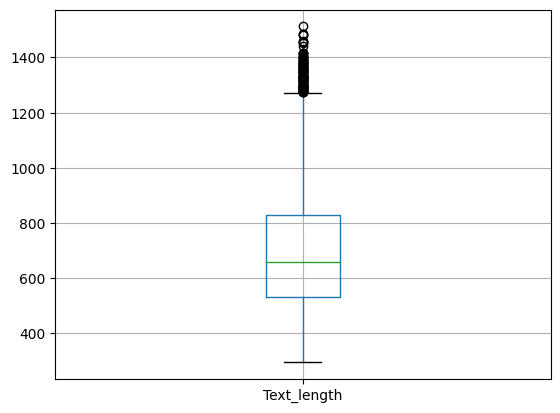

In [15]:
textos['Text_length'] = textos["Textos_espanol"].str.len()

import matplotlib.pyplot as plt

textos.boxplot(column='Text_length')

plt.show()

In [16]:
# Calcula el tercer cuartil (Q3)
Q3 = textos['Text_length'].quantile(0.75)

# Cuenta la cantidad de datos por encima de Q3
cantidad_encima = (textos['Text_length'] > Q3).sum()

print("Cantidad de datos encima del diagrama de cajas:", cantidad_encima)


Cantidad de datos encima del diagrama de cajas: 1012


El 25% de los datos tienen una longitud mayor atípica en comparación con todo el conjunto de datos.

### 4.2. Calidad y tratamiento

In [17]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    return [word.lower() for word in words]

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
    p = inflect.engine()  # Generar una instancia del motor inflect
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(int(word))  # Convertir la cadena a entero antes de la conversión
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    custom_list = ['two thousand', 'thousand and', 'mas','and','two','thousand']
    stop_words =  nltk.corpus.stopwords.words('english') + nltk.corpus.stopwords.words('spanish') + custom_list
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words
#lematizacion usando spicy ----------------------------------------------------------------
nlp = spacy.load('es_core_news_sm')
def lemmatize_words(words):
    doc = nlp(" ".join(words))
    lemmatized_words = [token.lemma_ for token in doc]
    return lemmatized_words
#lematizacion usando spicy ----------------------------------------------------------------
def preprocessing(words):
    words = to_lowercase(words)
    #words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    words = lemmatize_words(words)
    return words

In [18]:
textos['Textos_espanol_lem'] = textos['Textos_espanol'].apply(word_tokenize)

In [19]:
from sklearn.pipeline import make_pipeline



In [20]:
textos['Textos_espanol_lem'].dropna()

,Textos_espanol_lem
0,"[Por, ejemplo, ,, el, nÃºmero, de, consultas, ..."
1,"[En, 2007, ,, el, gobierno, central, financió,..."
2,"[Claramente, ,, hay, muchos, otros, factores, ..."
3,"[Por, ejemplo, ,, el, estado, australiano, de,..."
4,"[El, consumo, anual, de, alcohol, se, estima, ..."
...,...
4044,"[Para, ello, ,, identificará, las, cuestiones,..."
4045,"[La, participación, de, las, mujeres, en, role..."
4046,"[Según, el, WEF, ,, según, las, tendencias, de..."
4047,"[Sirve, como, recurso, y, foro, para, las, age..."


In [21]:
textos.shape

(4049, 10)

In [22]:
textos['Textos_espanol_lem'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4049 entries, 0 to 4048
Series name: Textos_espanol_lem
Non-Null Count  Dtype 
--------------  ----- 
4049 non-null   object
dtypes: object(1)
memory usage: 31.8+ KB


Se aplica eliminación de ruido:

In [23]:
textos['Textos_espanol_lem'] = textos['Textos_espanol_lem'].apply(preprocessing)

textos.head()

,Textos_espanol,sdg,Conteo,Max,Min,Mean,Std,Var,Text_length,Textos_espanol_lem
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,944,18,1,4.906250,3.472800,12.060338,944,"[ejemplo, naomero, consulta, externo, especial..."
1,"En 2007, el gobierno central financió directam...",3,476,14,1,5.115385,3.153974,9.947552,476,"[2007, gobierno, central, financio, directamen..."
2,"Claramente, hay muchos otros factores en juego...",3,1207,15,1,5.494624,3.412611,11.645917,1207,"[claramente, factor, juego, particular, varied..."
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,17,1,5.652439,3.620993,13.111589,1090,"[ejemplo, australiano, victoria, creer, agenci..."
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,13,1,4.179191,2.640742,6.973518,895,"[consumo, anual, alcohol, estimar, 157, litro,..."


In [24]:
textos['Textos_espanol_lem'] = textos['Textos_espanol_lem'].apply(lambda x: ' '.join(map(str, x)))
textos

,Textos_espanol,sdg,Conteo,Max,Min,Mean,Std,Var,Text_length,Textos_espanol_lem
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,944,18,1,4.906250,3.472800,12.060338,944,ejemplo naomero consulta externo especialista ...
1,"En 2007, el gobierno central financió directam...",3,476,14,1,5.115385,3.153974,9.947552,476,2007 gobierno central financio directamente so...
2,"Claramente, hay muchos otros factores en juego...",3,1207,15,1,5.494624,3.412611,11.645917,1207,claramente factor juego particular variedad ba...
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,17,1,5.652439,3.620993,13.111589,1090,ejemplo australiano victoria creer agencia pro...
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,13,1,4.179191,2.640742,6.973518,895,consumo anual alcohol estimar 157 litro ano ho...
...,...,...,...,...,...,...,...,...,...,...
4044,"Para ello, identificará las cuestiones de géne...",5,822,16,1,5.584000,3.793424,14.390065,822,él identificara cuestión genero destacado malt...
4045,La participación de las mujeres en roles de li...,5,514,16,1,5.437500,3.560841,12.679589,514,participacion mujer rol liderazgo dentro legis...
4046,"Según el WEF, según las tendencias de 2016, po...",5,445,17,1,5.558824,3.542418,12.548727,445,segun wef segun tendencia 2016 podria cerrar é...
4047,"Sirve como recurso y foro para las agencias, c...",5,1017,15,1,5.059524,3.173057,10.068292,1017,servir recurso foro agencia objetivo lograr en...


In [25]:
X_data, y_data = textos['Textos_espanol_lem'],textos['sdg']

Se utilizó el vectorizador TfidfVectorizer para convertir los textos en una representación numérica que toma en cuenta la importancia de cada palabra dentro de cada registro. Esta técnica fue elegida dado que es capaz de ajustar la frecuencia de las palabras al mismo tiempo que reduce la influencia de términos muy comunes que aparecen en múltiples registros, lo que permite resaltar aquellos términos que son más representativos del contenido de las opiniones.


In [26]:
# Partición de los datos
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

# Implementación de tdidf
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2))

X_train_ = tfidf.fit_transform(X_train).toarray()
X_train_ = pd.DataFrame(X_train_)

X_test_ = tfidf.transform(X_test).toarray()
X_test_ = pd.DataFrame(X_test_)

X_train_

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105180
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058811
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087950
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3235,0.0,0.0,0.0,0.175488,0.0,0.0,0.0,0.141246,0.174757,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3236,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.360617
3237,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


## 5. Modelado y evaluación


### 5.1. Algoritmo 1
Implementado por: Obed Cabanzo

A continuación, se detallan los algoritmos escogidos y las justificaciones para cada una de las decisiones tomadas en el diseño del modelo:

1. **TfidfVectorizer**

  Se realizó un ajuste del hiperparámetro max_features de TfidfVectorizer haciendo cross validation mediante la herramienta de búsqueda en cuadrícula (GridSearchCV) para determinar el número óptimo de características que mejor representen los textos. Este proceso garantizó que se seleccionara el numero maximo de palabras más relevantes para la clasificación sin incluir demasiado ruido.

2. **Gaussian Naive Bayes**

  El modelo de Naive Bayes, específicamente la variante GaussianNB, fue elegido para esta tarea debido a su capacidad para manejar eficientemente problemas de clasificación multiclase con datos continuos, como los vectores resultantes del TF-IDF. Además, este modelo tiene la ventaja de ser rápido y simple de interpretar, lo cual es ideal para problemas donde las relaciones entre características son condicionalmente independientes.

  Se optó por el algoritmo GaussianNB ya que los vectores densos obtenidos del proceso de TF-IDF pueden ser tratados como datos continuos, lo cual es compatible con el enfoque probabilístico de este clasificador.


In [27]:
# Importación de librerias

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay

In [28]:
# Selección de datos
x_data, y_data = textos['Textos_espanol_lem'],textos['sdg']

#### 5.1.1 **GridSearchCV y Cross validation**

  Para optimizar el modelo, se empleó la herramienta GridSearchCV con validación cruzada de 10 folds (cv=10), que permitió explorar múltiples configuraciones del hiperparámetro max_features del TF-IDF y seleccionar la mejor opción con base en el F1-score ponderado. Esta métrica fue seleccionada ya que en problemas multiclase es importante equilibrar la precisión y el recall de cada clase, ponderando según el soporte de cada una.

In [29]:
# Especificar los hiperparámetros a considerar: max_features del TfidfVectorizer
param_grid = {
    'tfidf__max_features': [500, 750, 1000, 1250 , 1500],
    'tfidf__ngram_range': [(1, 1), (1, 2)]
}

def to_dataframe(values):
  return pd.DataFrame(values)

# Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
     ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)), # Transformar matrices dispersas a densas para GaussianNB
    ('nb', GaussianNB())
])

# Realizar cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_weighted')
grid_search.fit(x_data, y_data)

# Mostrar los mejores hiperparámetros y resultados
best_max_features = grid_search.best_params_["tfidf__max_features"]
best_ngram_range = grid_search.best_params_["tfidf__ngram_range"]

print("Mejores parámetros:", best_max_features)
print("Mejor precisión:", best_ngram_range)


Mejores parámetros: 500
Mejor precisión: (1, 1)


In [30]:
# Partición de los datos
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

# Implementación de tdidf
tfidf = TfidfVectorizer(max_features=best_max_features, ngram_range=best_ngram_range)

X_train_ = tfidf.fit_transform(X_train).toarray()
X_train_ = pd.DataFrame(X_train_)

X_test_ = tfidf.transform(X_test).toarray()
X_test_ = pd.DataFrame(X_test_)

X_train_

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.000000,0.142886,0.142135,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.132837,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.173328,0.0,0.175637,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.091040
4,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
3235,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.193726
3236,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
3237,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [31]:
model = GaussianNB()
model.fit(X_train_, y_train)

GaussianNB()

In [32]:
y_pred = model.predict(X_test_)

#### 5.1.2 **Matriz de confusión**

  Después de entrenar el modelo, se visualizó su desempeño mediante una matriz de confusión, lo que permitió observar de manera detallada cuántas instancias de cada clase fueron clasificadas correctamente y dónde ocurrieron los errores. Además, se generó un informe de clasificación que muestra las métricas de precisión, recall y F1-score para cada clase (ODS 3, 4 y 5). Estas métricas son fundamentales para evaluar el rendimiento del modelo en cada una de las categorías y justificar su uso para este problema.

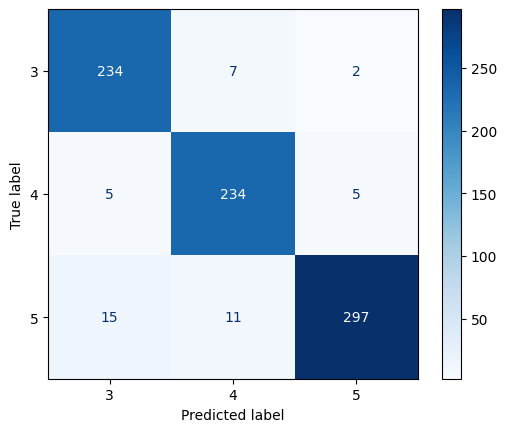

In [33]:
# Se puede visualizar la matriz de confusión
#plot_confusion_matrix(arbol, X_test, Y_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

#### 5.1.3 **Resultados del modelo**

  El mejor modelo seleccionado mostró un F1-score ponderado de 0.94, con una alta precisión y recall en todas las clases. Esto indica que el modelo es capaz de relacionar de manera efectiva las opiniones ciudadanas con los ODS 3, 4 y 5, permitiendo automatizar el análisis de estas problemáticas con un alto grado de exactitud.

  Este enfoque se justifica no solo por su rendimiento, sino también por su capacidad para escalar a grandes volúmenes de datos, haciendo que el análisis de las opiniones ciudadanas sea más eficiente y menos dependiente de la intervención humana especializada.



In [34]:
print("Mejor score:", grid_search.best_score_)
print("\n", classification_report(y_test, y_pred))

Mejor score: 0.9461560946291969

               precision    recall  f1-score   support

           3       0.92      0.96      0.94       243
           4       0.93      0.96      0.94       244
           5       0.98      0.92      0.95       323

    accuracy                           0.94       810
   macro avg       0.94      0.95      0.94       810
weighted avg       0.95      0.94      0.94       810



### 5.2. Algoritmo 2
Implementado por: Felipe Lancheros.

El árbol de decisión requieren de muy poca preparación de datos. Con esto se gana flexibilidad, manejando diferentes tipos de datos y logrando un mayor rendimiento incluso con valores faltantes, algo que Naive Bayes no puede (IBM). No necesitan escalado de características, ya que cada vez se va fragmentando hasta llegar a las etiquetas definidas. Todo esto aporta valiosamente al análisis de los datos en ese contexto ya que realmente solo se está trabajando con una única variable explicativa de la variable objetivo. El hecho de que esté en texto hace que la variable sea muy general y por ende deba ser tratada granularmente.
Al haber hecho TF-IDF, se facilita el cálculo de métricas que evalúan el modelo.


In [35]:
# Para generar el arbol de decisión
from sklearn.tree import DecisionTreeClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold

#Librerías para la visualización
import matplotlib as mplt
import seaborn as sns
from sklearn import tree

In [36]:
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
from sklearn.preprocessing import OneHotEncoder

print(X_train_.shape)
print(X_test_.shape)
# Generación y entranmiento del árbol
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)
arbol = arbol.fit(X_train_,y_train)

(3239, 500)
(810, 500)


In [38]:
y_pred = arbol.predict(X_test_)

#### 4.2.1. Evaluación del modelo

In [39]:
cm_2 = confusion_matrix(y_test, y_pred)

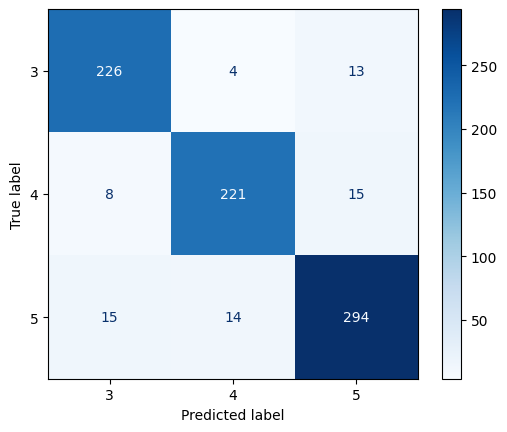

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=arbol.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [41]:
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred))
print("Recall: {}".format(recall_score(y_test,y_pred, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred, average="macro")))

Exactitud: 0.91
Recall: 0.9153318584825536
Precisión: 0.9151200642726142
Puntuación F1: 0.9151469885347416


In [42]:
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred))
print("Recall: {}".format(recall_score(y_test,y_pred, average="weighted")))
print("Precisión: {}".format(precision_score(y_test,y_pred, average="weighted")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred, average="weighted")))

Exactitud: 0.91
Recall: 0.9148148148148149
Precisión: 0.9149267793926837
Puntuación F1: 0.9147993840390145


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.91      0.93      0.92       243
           4       0.92      0.91      0.92       244
           5       0.91      0.91      0.91       323

    accuracy                           0.91       810
   macro avg       0.92      0.92      0.92       810
weighted avg       0.91      0.91      0.91       810



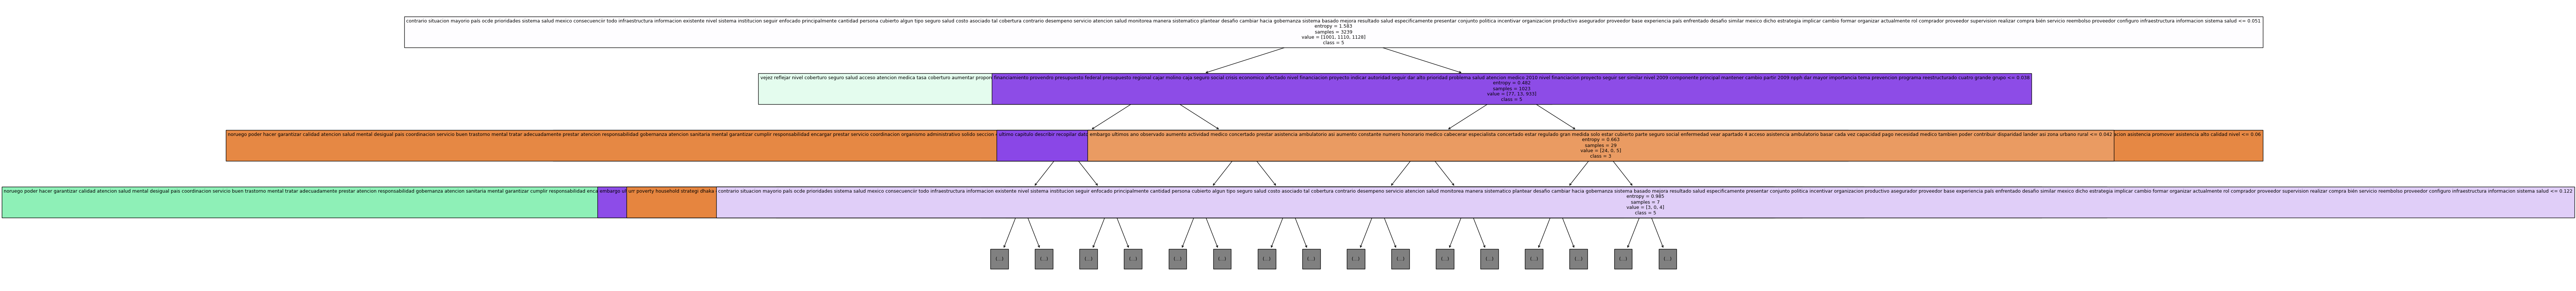

In [44]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X_data, class_names=["3", "4", "5"], filled=True, fontsize=9)

Se logró profundizar mayormente en las cadenas de texto y vemos cómo se logra que la información sea más manejable. Gracias a esto, la entropía (desorden) se mantiene baja a lo largo de las diferentes muestras.

In [45]:
fig.savefig("decistion_tree.png")

#### 4.2.2. Mejora del modelo según los hiperparámetros

Los árboles de decisión no tienen un número fijo de parámetros antes del entrenamiento. Por ello, se pueden ajustar con el fin de controlar su complejidad. Según la función para medir la calidad de las divisiones, la profundidad máxima del árbol determinando su "pureza" y el número mínimo de muestras necesarias para dividr el nodo, se buscará aumentar las métricas con el fin de optimizar el modelo. Los mejores valores estarán dados por la realización de la validación cruzada de particiones.

In [46]:
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [47]:
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20],'min_samples_split':[2, 3, 4, 5]}

In [48]:
arbol = DecisionTreeClassifier(random_state=0)

In [49]:
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train_, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

In [50]:
mejor_modelo.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 3}

In [51]:
arbol_final = mejor_modelo.best_estimator_

y_pred_train = arbol_final.predict(X_train_)
y_pred_test = arbol_final.predict(X_test_)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.98
Exactitud sobre test: 0.93


Acá es posible identificar que entre más profundo es el árbol podemos lograr mayor precisión ya que se estaba desglosando cada cadana en mayor detalle. Sin embargo, se está corriendo el riesgo de overfitting, ya que la exactitud sobre el test no ha mejorado y es posible que no se deba extender tanto el árbol: se debe podar.

In [52]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           3       0.90      0.95      0.93       243
           4       0.95      0.91      0.93       244
           5       0.94      0.93      0.93       323

    accuracy                           0.93       810
   macro avg       0.93      0.93      0.93       810
weighted avg       0.93      0.93      0.93       810



In [53]:
y_pred_test = arbol_final.predict_proba(X_test_.iloc[[105]])

In [54]:
arbol_final.classes_

array([3, 4, 5])

### 5.3. Algoritmo 3
Implementado por: David Santiago Tapias Guzman.

#### Algoritmo: Máquinas de Vectores de Soporte (SVM)
##### ¿Qué es SVM?

El algoritmo de Máquinas de Vectores de Soporte (SVM, por sus siglas en inglés) es un método de aprendizaje automático utilizado para clasificación y regresión. En la clasificación, SVM encuentra un hiperplano en un espacio de múltiples dimensiones que separa las clases (son las categorías o grupos a los que los datos de entrada se asignarán) de manera óptima.

¿Cómo funciona SVM?

Clasificación: SVM busca el hiperplano que maximiza el margen entre las dos clases. El margen es la distancia entre el hiperplano y los puntos de datos más cercanos de cada clase.
Núcleo: SVM puede manejar datos que no son linealmente separables mediante el uso de funciones de núcleo (kernel), que transforman los datos en un espacio de características de mayor dimensión donde las clases pueden ser separadas linealmente.
##### Hiperparámetros de SVM
###### C (Coeficiente de Regularización) Valor: [0.1, 1, 10]
Controla el equilibrio entre maximizar el margen y minimizar el error de clasificación en el conjunto de entrenamiento. Un valor bajo de C permite un margen más amplio pero puede aceptar más errores de clasificación, mientras que un valor alto de C busca una clasificación precisa incluso a expensas de un margen más estrecho.
Este hiperparametro ajusta el compromiso entre la precisión y el margen del modelo. Un valor alto de C puede llevar a un modelo más complejo y susceptible al sobreajuste, mientras que un valor bajo de C puede llevar a un modelo más simple que puede no captar todas las complejidades de los datos.

##### Kernel (Tipo de Núcleo) valores: ['linear', 'rbf']
Define el tipo de función de núcleo que se utiliza para transformar los datos a un espacio de mayor dimensión. Es adecuado para datos que son linealmente separables.

##### rbf (Radial Basis Function):
Utiliza una función de base radial para manejar datos no linealmente separables. Mapea los datos a un espacio de características de alta dimensión para encontrar un margen de separación no lineal.
El tipo de núcleo afecta cómo se transforman los datos y qué tan complejo puede ser el modelo. linear es más simple y más rápido, mientras que rbf es más flexible y puede manejar relaciones más complejas entre los datos.
##### gamma (Parámetro del Núcleo RBF) Valores: [0.001, 0.01, 0.1, 1]
Descripción: Controla el alcance de la influencia de un solo punto de entrenamiento. Un valor bajo de gamma significa que el alcance de la influencia es grande, lo que puede resultar en un modelo más suave y menos ajustado. Un valor alto de gamma significa que el alcance es pequeño, lo que puede hacer que el modelo sea más complejo y ajustado a los datos de entrenamiento.
Este hiperparametro ajusta el impacto de cada punto de datos en la frontera de decisión. Un gamma alto puede llevar a un modelo sobreajustado (ajustado demasiado a los datos de entrenamiento), mientras que un gamma bajo puede llevar a un modelo subajustado (no captura la complejidad de los datos).

### Razones para Elegir el Algoritmo SVM
#### Separación Clara entre Clases:
SVM es eficaz para encontrar un hiperplano que maximiza el margen entre diferentes clases. Esto significa que el modelo intentará encontrar el mejor límite que separa las opiniones clasificadas en diferentes ODS.
Esto puede ser particularmente útil si las opiniones están claramente separadas en función de las características extraídas, como el contenido de texto.  

#### Manejo de Datos No Linealmente Separables:

Con el uso de núcleos (kernels), como el rbf (Radial Basis Function), SVM puede manejar datos que no son linealmente separables en su forma original. Si las opiniones no se pueden separar fácilmente en un espacio lineal, el kernel rbf puede transformar el espacio de características para encontrar una separación efectiva.
#### Eficiencia en Espacios de Alta Dimensión:
SVM funciona bien en espacios de alta dimensión, que es común en problemas de procesamiento de lenguaje natural (PLN) donde los datos se vectorizan (por ejemplo, mediante TF-IDF).
La vectorización del texto mediante TfidfVectorizer genera un espacio de características de alta dimensión, y SVM es adecuado para manejar estos espacios de manera eficiente.

#### Regularización y Generalización:

El parámetro C en SVM controla el equilibrio entre un margen amplio y la clasificación precisa en el conjunto de entrenamiento. Esto ayuda a prevenir el sobreajuste y asegura que el modelo generalice bien a datos no vistos.

In [55]:
# Selección de datos
x_data_svm, y_data_svm = textos[['Textos_espanol_lem']],textos['sdg']

In [57]:
print(x_data_svm.columns)

Index(['Textos_espanol_lem'], dtype='object')


In [58]:
tf_idf_svm = TfidfVectorizer()

vectorizer_svm =  TfidfVectorizer()
preprocessor_svm = ColumnTransformer(
    transformers=[
        ('text', vectorizer_svm, "Textos_espanol_lem"),
    ])
X_preprocessed_svm = preprocessor_svm.fit_transform(x_data_svm)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_preprocessed_svm, y_data_svm, test_size=0.4, random_state=0)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.01, 0.1, 1]}

# Genera el clasificador SVM
clf = svm.SVC()

# Genera un objeto GridSearchCV
grid_search_svm = GridSearchCV(clf, param_grid_svm, cv=5, scoring='f1_weighted')

# Realiza la búsqueda de cuadrícula en los datos de entrenamiento
grid_search_svm.fit(X_train_svm, y_train_svm)
# Realiza predicciones en el conjunto de prueba con el mejor modelo
y_pred_svm = grid_search_svm.predict(X_test_svm)
# Calcula la precisión del modelo
f1_score_svm = accuracy_score(y_test_svm, y_pred_svm)
print("Precisión del modelo SVM con mejores parámetros:", f1_score_svm)


Precisión del modelo SVM con mejores parámetros: 0.9777777777777777


1. TfidfVectorizer() es utilizado para convertir texto en una matriz de características basada en TF-IDF (Term Frequency-Inverse Document Frequency).  
2. ColumnTransformer aplica transformaciones a diferentes columnas del DataFrame. En este caso, TfidfVectorizer se aplica únicamente a la columna 'Textos_espanol_lem'.
3. preprocessor.fit_transform(x_data_sv) aplica la transformación a la columna de texto. El resultado es una matriz de características TF-IDF.
4. train_test_split divide los datos en conjuntos de entrenamiento y prueba. Aquí, test_size=0.4 significa que el 40% de los datos se utiliza para prueba y el 60% para entrenamiento.
5. param_grid especifica los hiperparámetros a considerar en la búsqueda de cuadrícula: el valor de C, el tipo de núcleo kernel, y el parámetro gamma.
6. Se crea una instancia del clasificador SVM (SVC).
7. GridSearchCV se utiliza para encontrar los mejores hiperparámetros mediante la búsqueda en cuadrícula.
cv=5 especifica el número de pliegues en la validación cruzada.
scoring='f1_weighted' define la métrica de evaluación como la puntuación F1 ponderada.
8. Se ajusta el objeto GridSearchCV a los datos de entrenamiento para encontrar el mejor modelo y los mejores parámetros.
9. Se utilizan los mejores parámetros encontrados para predecir las etiquetas en el conjunto de prueba.
10. f1_score calcula la precisión del modelo comparando las predicciones con las etiquetas verdaderas del conjunto de prueba.
Se imprime la precisión del modelo con los mejores parámetros encontrados.


In [59]:
print(classification_report(y_test_svm, y_pred_svm))

              precision    recall  f1-score   support

           3       0.98      0.97      0.98       519
           4       0.97      0.99      0.98       549
           5       0.98      0.97      0.98       552

    accuracy                           0.98      1620
   macro avg       0.98      0.98      0.98      1620
weighted avg       0.98      0.98      0.98      1620



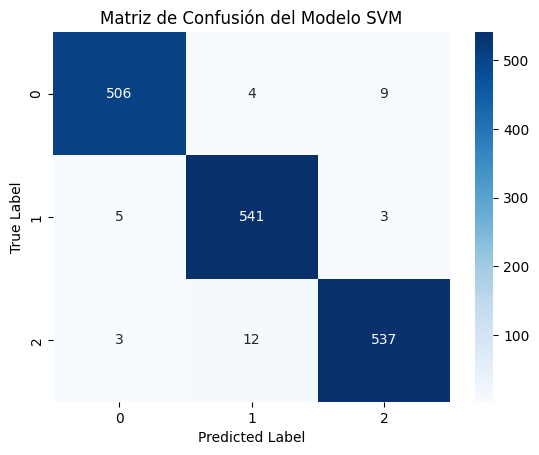

In [60]:
# Genera la matriz de confusión
conf_matrix_svm = confusion_matrix(y_test_svm, y_pred_svm)

sns.heatmap(data=conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión del Modelo SVM')
plt.show()

## 6. Resultados

### 6.1. Análisis de métricas de calidad

El análisis de los resultados obtenidos con el algoritmo SVM sugiere un rendimiento muy sólido, es por eso que es el modelo seleccionado.

### Ventajas de usar SVM basadas en los resultados:
Alta Precisión (Accuracy): El modelo alcanza un 98% de precisión, lo cual indica que la mayoría de las predicciones realizadas fueron correctas. Esto es un resultado muy fuerte, particularmente cuando se busca alta exactitud en la clasificación.

### Consistencia entre Clases:
Las métricas de precisión, recall y F1-score son consistentes a lo largo de todas las clases. Esto es un indicativo de que el modelo no solo es preciso, sino también balanceado, es decir, predice bien en todas las clases y no favorece a ninguna en particular.

### Buen Rendimiento Global:
Las métricas promedio ponderado y promedio macro muestran que el rendimiento global del modelo es excelente en todas las clases, manteniendo un equilibrio entre precisión y recall.

### Manejo de Clases Desbalanceadas:
Aunque las clases tienen diferentes tamaños (519, 549 y 552 instancias respectivamente), el SVM maneja este desbalance de manera efectiva, logrando métricas de F1-score muy altas en todas las clases.

### Potenciales Desventajas:
Costo Computacional: SVM, especialmente con un kernel no lineal como el RBF, puede ser computacionalmente costoso, especialmente en conjuntos de datos grandes. Si el tiempo de entrenamiento o la predicción son factores importantes, otros algoritmos como Random Forest podrían ser considerados.

### Interpretabilidad:
Aunque SVM es muy poderoso para tareas de clasificación, su interpretación puede ser más difícil comparado con otros algoritmos como los árboles de decisión, donde es más fácil entender por qué se hizo una clasificación particular.

### Ajuste de Hiperparámetros:
El rendimiento de SVM puede depender en gran medida del ajuste de hiperparámetros (como C, gamma, y kernel). En este caso, se ha realizado una búsqueda en cuadrícula para optimizar estos hiperparámetros, lo que ha resultado en buenos resultados, pero este proceso puede ser costoso y requiere tiempo.

Conclusión:
Con base en los resultados, el uso de SVM es una excelente opción para este conjunto de datos, ya que logra una precisión muy alta y un equilibrio adecuado entre precisión y recall en todas las clases. Sin embargo, es importante considerar el costo computacional y la necesidad de optimización de hiperparámetros cuando se implementa SVM en situaciones más complejas o en datasets más grandes.

### 6.2. Relacionamieto de palabras

Se llevará a cabo un análisis de las palabras más relevantes en las opiniones, considerando las 10 palabras más mencionadas para cada clase (ODS 3, 4 y 5). Para ello, se empleó la técnica TF-IDF (Term Frequency - Inverse Document Frequency), que permite identificar las palabras más importantes en los registros. El TF-IDF asigna un peso a cada palabra, incrementando su valor en función de su frecuencia dentro de un documento específico y reduciéndolo en proporción a su aparición en todos los documentos, lo que facilita identificar los términos más representativos para cada objetivo.

In [61]:
from wordcloud import WordCloud

In [62]:
# Selección de datos
x_data, y_data = textos['Textos_espanol_lem'],textos['sdg']


In [63]:
# Aplicar tf-idf a los datos
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

X_data_ = tfidf.fit_transform(x_data).toarray()
X_data_ = pd.DataFrame(X_data_ , columns=tfidf.get_feature_names_out())

X_data_

,000,10,100,11,12,13,14,15,15 ano,16,...,vido,vinculo,violencia,violencia mujer,vision,visto,vivir,zelanda,zona,él
0,0.0,0.0,0.0,0.0,0.0,0.0,0.166286,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.080859
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.133622,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.068724
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.223557,0.0,0.134581,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.076833
4045,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000
4046,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.108058
4047,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.175511,0.21956,0.0,0.0,0.000000,0.0,0.0,0.000000



ODS 3 - Palabras más relevantes: ['salud', 'atencion', 'servicio', 'paciente', 'medico', 'sanitario', 'enfermedad', 'mental', 'sistema', 'país']



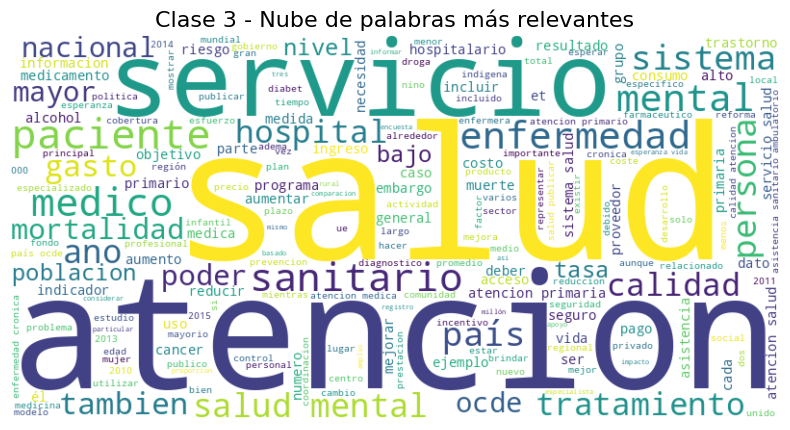


ODS 4 - Palabras más relevantes: ['educacion', 'escuela', 'docente', 'estudiante', 'escolar', 'aprendizaje', 'educativo', 'alumno', 'evaluacion', 'profesor']



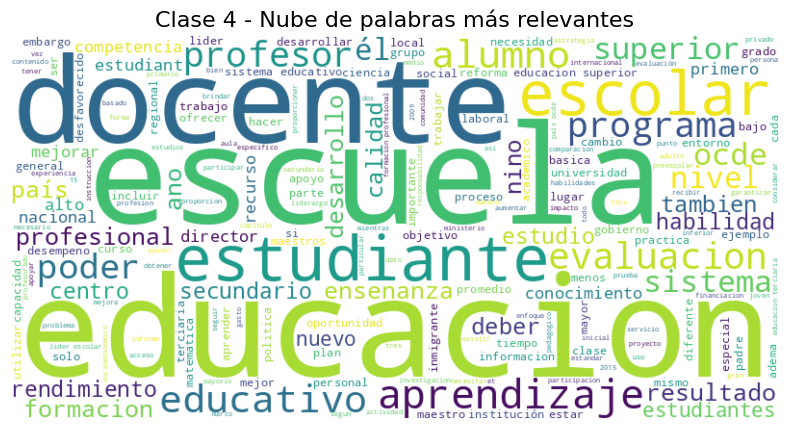


ODS 5 - Palabras más relevantes: ['mujer', 'genero', 'hombre', 'igualdad', 'poder', 'trabajo', 'violencia', 'país', 'igualdad genero', 'social']



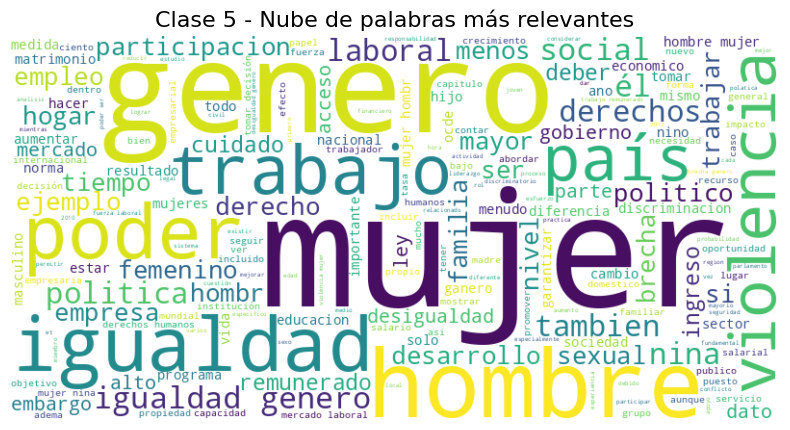

In [64]:


# Obtener las clases únicas (ODS 3, 4 y 5)
classes = y_data.unique()
custom_list = ['two thousand', 'thousand and', 'mas','and','two','thousand']
stop_words =  nltk.corpus.stopwords.words('english') + nltk.corpus.stopwords.words('spanish') + custom_list

# Iterar sobre cada clase
for class_label in classes:
    # Filtrar los registros correspondientes a la clase actual
    class_indices = y_data[y_data == class_label].index
    X_class = X_data_.iloc[class_indices]

    # Calcular el promedio del TF-IDF para cada palabra en la clase
    class_mean_tfidf = X_class.mean(axis=0)

    # Generar un diccionario con las palabras y sus puntuaciones para WordCloud
    top_10_words = class_mean_tfidf.nlargest(10).index.tolist()
    print(f"\nODS {class_label} - Palabras más relevantes: {top_10_words}\n")
    word_tfidf_dict = {word: class_mean_tfidf.iloc[i] for i, word in enumerate(tfidf.get_feature_names_out())}

    # Generar la nube de palabras

    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate_from_frequencies(word_tfidf_dict)

    # Guardar las palabras más relevantes (opcional)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f"Clase {class_label} - Nube de palabras más relevantes", fontsize=16)
    plt.show()




#### 6.2.1. Análisis de las palabras identificadas, su relación con los ODS y propuesta de estrategias
1. **ODS 3 - "Salud y bienestar":**

  **Palabras clave:** salud, atención, servicios, pacientes, mental, países, enfermedades, atención primaria, médicos, primaria

  Estas palabras resaltan la importancia de la atención sanitaria en los países,  términos más mencionados resultan ser "salud", "atención" y "servicios", lo que sugiere que las opiniones están centradas en la calidad y accesibilidad de los servicios de salud. La mención de "enfermedades", "atención primaria", y "mental" revela un enfoque hacia los tratamientos medicos de primera instancia y de prevencion para la salud mental y fisica.

  **Posibles estrategias para la organización:**

  1. Fortalecer la atención primaria: Dado que la "atención primaria" y "enfermedades" son clave, se deben reforzar estrategias para ampliar el acceso a servicios de salud esenciales.

  2. Salud mental: La aparición de "mental" subraya la necesidad de mejorar los recursos y servicios de salud mental, integrándolos en los sistemas de salud pública.

2. **ODS 4 - "Educación de calidad":**
  
  **Palabras clave:** educación, estudiantes, escuelas, aprendizaje, docentes, alumnos, escuela, evaluación, profesores, escolar

  El enfoque en términos como "educación", "escuelas", "estudiantes" y "aprendizaje" refleja preocupaciones sobre la calidad del acceso a la educación y las oportunidades de aprendizaje. Las menciones de "docentes" y "evaluación" apuntan hacia la importancia del cuerpo docente y los sistemas de evaluación en la mejora de los resultados educativos.

  **Posibles estrategias para la organización:**

  1. Capacitación docente: Dado que "docentes" y "profesores" son palabras clave, se deben desarrollar programas que fortalezcan las capacidades pedagógicas de los maestros para mejorar la calidad del aprendizaje.
  
  2. Evaluación continua del aprendizaje: El uso frecuente de "evaluación" y "formación" señala la necesidad de establecer sistemas de evaluación que midan de forma precisa el progreso académico y ajusten los métodos de enseñanza.

3. **ODS 5 - "Igualdad de género":**
  
  **Palabras clave:** mujeres, género, hombres, igualdad, derechos, trabajo, violencia, países, mujer, igualdad género

  Las palabras resaltan temas relacionados con la desigualdad de género, destacando "mujeres", "igualdad" y "derechos", lo que sugiere una preocupación sobre la discriminación y la falta de igualdad de oportunidades para las mujeres. La presencia de "violencia" subraya la necesidad de abordar la violencia de género.

  **Posibles estrategias para la organización:**

  1. Promover la igualdad de género en el ámbito laboral: La mención de "trabajo" sugiere que se deben crear políticas que promuevan la equidad en el empleo y eliminar la discriminación laboral por género.
  
  2. Combate contra la violencia de género: La palabra "violencia" es un recordatorio de que es crucial implementar campañas y políticas para proteger a las mujeres de la violencia, garantizando la seguridad de los derechos humanos.
  
  3. Educación sobre derechos de género: Promover programas de concienciación que eduquen tanto a hombres como a mujeres sobre la importancia de la igualdad de género y los derechos humanos.

  Este análisis permite identificar las áreas más críticas que requieren intervención según las opiniones ciudadanas, ofreciendo a la organización una visión clara de las preocupaciones de la población. Al priorizar las acciones con base en las palabras clave más mencionadas, la organización puede diseñar estrategias focalizadas y de alto impacto, optimizando recursos y dirigiendo sus esfuerzos hacia las necesidades más urgentes.

## 7. Mapa de actores

| Rol                   | Tipo de Actor         | Beneficio                                                                                                                                                                     | Riesgo                                                                                       |
|-----------------------|------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| **Analista de Datos** | Empleado de UNFPA      | Mejora en la eficiencia del análisis de datos textuales, reduciendo el tiempo y los recursos necesarios para clasificar opiniones.                                           | Dependencia del modelo puede llevar a errores si el modelo no es bien ajustado o actualizado. |
| **Ciudadano**         | Beneficiario           | Recepción de respuestas más rápidas y precisas a sus opiniones, con una mejor alineación de sus comentarios con los ODS relevantes.                                        | Posible falta de comprensión o interpretación incorrecta de sus comentarios por el modelo.  |
| **Desarrollador Web** | Proveedor              | Implementación efectiva del modelo en la aplicación web o móvil, facilitando la integración y uso del modelo.                                                               | Complejidad en la integración del modelo puede causar retrasos o problemas técnicos.        |
| **Financiador**       | Entidad Financiera     | Valoración del impacto del financiamiento mediante la mejora de procesos analíticos y resultados más eficientes.                                                             | Riesgo financiero si el modelo no cumple con las expectativas o no se implementa correctamente. |
| **Gestor de Proyecto**| Empleado de UNFPA      | Coordinación efectiva del desarrollo del modelo y su implementación, garantizando que el proyecto se mantenga en camino y dentro del presupuesto.                           | Falta de gestión adecuada puede llevar a retrasos y sobrecostos.                            |
| **Investigador**      | Colaborador Académico  | Generación de nuevas oportunidades de investigación basadas en el análisis de datos y resultados del modelo.                                                                | Posible falta de robustez en los datos puede afectar la validez de futuras investigaciones. |
| **Responsable de Políticas** | Empleado de UNFPA | Desarrollo de políticas y estrategias basadas en los insights generados por el modelo, mejorando la alineación con los ODS.                                               | Las políticas basadas en datos incorrectos pueden llevar a decisiones ineficaces.           |
| **Gestor de Datos**   | Empleado de UNFPA      | Mejor administración y manejo de los datos textuales recogidos, optimizando el proceso de clasificación y análisis.                                                         | Pérdida de datos o problemas de calidad pueden afectar la precisión del modelo.             |
| **Auditor**           | Entidad Externa        | Evaluación de la precisión y efectividad del modelo, asegurando que cumple con los estándares y objetivos establecidos.                                                      | Dificultades para identificar y corregir problemas si el modelo es opaco o complejo.       |
| **Usuario Final**     | Ciudadano              | Acceso a una plataforma que ofrece un análisis más relevante y útil de sus opiniones en relación con los ODS, mejorando la participación ciudadana.                          | La falta de accesibilidad o facilidad de uso del sistema puede limitar la participación.     |

## 8. Persistencia del modelo

Mejores parámetros: {'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.96      0.97      0.96       243
           4       0.97      0.97      0.97       244
           5       0.99      0.98      0.99       323

    accuracy                           0.97       810
   macro avg       0.97      0.97      0.97       810
weighted avg       0.97      0.97      0.97       810



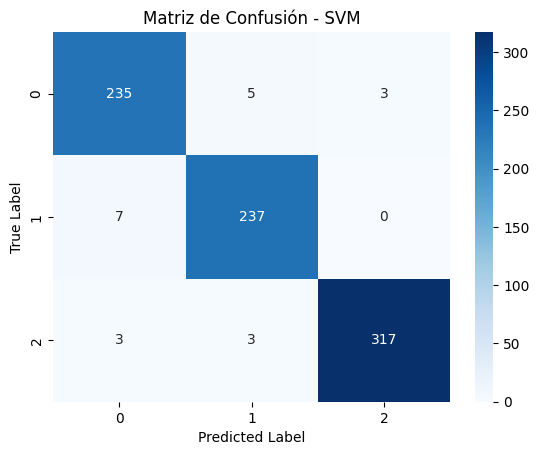

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from joblib import dump, load

# Definir el pipeline de procesamiento
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

# Pipeline con vectorización y modelo SVC
pipelineF = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('svm', SVC())
])

# Parámetros para GridSearchCV
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': [0.001, 0.01, 0.1, 1]
}

# Búsqueda de los mejores hiperparámetros con GridSearchCV
grid_search = GridSearchCV(pipelineF, param_grid, cv=5, scoring='f1_weighted')

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Resultados del mejor modelo
print("Mejores parámetros:", grid_search.best_params_)

# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Evaluar el modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión - SVM')
plt.show()

In [69]:
filename = "model.joblib"

In [86]:
dump(grid_search, filename)

['model.joblib']

In [87]:
pipeline_loaded = load(filename)

In [89]:
y_pred = pd.DataFrame(pipeline_loaded.predict(X_test))
y_pred.to_csv("202420_Proyecto 1.1. - ODS.predictions.csv", index=False)

## 9. Referencias
* [UNDP, 2024]: Objetivos de Desarrollo Sostenible | Programa De Las Naciones Unidas Para El Desarrollo. (n.d.). UNDP. https://www.undp.org/es/sustainable-development-goals
* [UNFPA, 2024]: UNFPA en Colombia. (n.d.). UNFPA-Colombia. https://colombia.unfpa.org/es/unfpa-en-colombia
* [DANE, 2022]: DANE. (2022). Mujeres y hombres: brechas de género en Colombia. Recuperado 3 de septiembre de 2024, de https://www.dane.gov.co/files/investigaciones/genero/publicaciones/mujeres-y-hombre-brechas-de-genero-colombia-resumen-ejecutivo-2daEdicion.pdf
* [DANE, 2022]: DANE. (2022). Mujeres y hombres: brechas de género en Colombia. Recuperado 3 de septiembre de 2024, de https://www.dane.gov.co/files/investigaciones/genero/publicaciones/mujeres-y-hombre-brechas-de-genero-colombia-presentacion-2daEdicion.pdf
* IBM: ¿Qué es un árbol de decisión? | IBM. (n.d.). https://www.ibm.com/es-es/topics/decision-trees

